In [ ]:
data['sex'] = data['sex'].replace([1,2], ['Male', 'Female']) 
data['sex'].value_counts().plot(kind='pie')   #원그래프
data['sex'].value_counts().plot(kind='bar')   #막대그래프
data.hist(bins=100, figsize=(10,5))  #히스토그램
data.boxplot(column='salary', return_type='both')  #박스플롯
plt.scatter(data['sex'], data['salary'], alpha=1)  #스캐터

<이상값 제거>
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary-Q1_salary
data_IQR = data[(data['salary']<Q3_salary+IQR_salary*1.5)&(data['salary']>Q1_salary-IQR_salary*1.5)]

<변환>
data['log_salary'] = np.log(data['salary'])
data['sqrt_salary'] = np.sqrt(data['salary'])

<결측값>
data.isnull()   
data.notnull()
data.isnull().sum()
data['salary'].isnull().sum()    #'salary'의 결측 개수 합
data.notnull().sum(1)          #각각 행별로 결측 개수 합

<결측값 제거>
data_del_row = data.dropna(axis=0)   #행(가로)
data_del_col = data.dropna(axis=1)  #열(세로)
data[['salary']].dropna()   #행,열

<결측값 대체>
data_0 = data.fillna(0)   #0으로 대체
data_ffill = data.fillna(method='ffill')   #앞의 값으로 대체
data_bfill = data.fillna(method='bfill')   #뒤의 값으로 대체
data_mean = data.fillna(data.mean())   #평균으로 대체
data_mean = data.fillna(data.median())   #중간값으로 대체
data2['sales_new'] = np.where(pd.notnull(data2['sales'])==True, data2['sales'], data2['salary'])

#최종
import numpy as np
import pandas as pd

data = pd.read_csv('house_raw.csv')

new_data = data[(data['bedrooms']<0.4) & (data['households']<6) & (data['rooms']<10)]
new_data.hist(bins=10, figsize=(15,10))
#data_rooms = data[data['rooms']<20]
#data_rooms['rooms'].hist(bins=50, figsize=(10,5))
#print(data['rooms'].value_counts().sum())
#print(data_rooms2['rooms'].value_counts().sum())

X = new_data[new_data.columns[0:5]]
y = new_data[["house_value"]]

#라이브러리 불러오기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

#데이터 정규화
from sklearn.preprocessing import MinMaxScaler  
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

#선형모델을 적용
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

#훈련데이터 정확도 확인: 55%
pred_train = model.predict(X_scaled_minmax_train)
print("훈련 데이터 정확도", model.score(X_scaled_minmax_train, y_train))

#훈련데이터 정확도 확인: 55%
pred_test = model.predict(X_scaled_minmax_test)
print("테스트데이터 정확도", model.score(X_scaled_minmax_test, y_test))

new_data.to_csv('housing_price.csv', index=False)

#1. 단변량 데이터 검색

1) 범주형 자료

In [4]:
import pandas as pd
data = pd.read_csv('EX_CE0Salary.csv', encoding='utf-8')  #한글깨짐방지
data.info()                        #정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


In [38]:
data.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


In [8]:
data['sex'] = data['sex'].replace([1,2], ['Male', 'Female'])  #숫자일때 문자로 대체
data['sex'].value_counts()         #범주별 빈도

Male      39
Female    39
Name: sex, dtype: int64

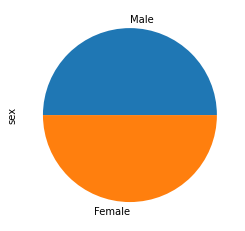

In [11]:
import matplotlib.pyplot as plt
data['sex'].value_counts().plot(kind='pie')   #원그래프

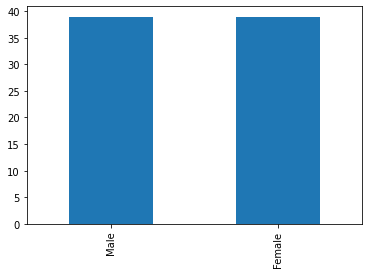

In [12]:
data['sex'].value_counts().plot(kind='bar')   #막대그래프

2) 연속형 자료

In [13]:
data.describe()    #변수별 요약통계량

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [16]:
data.skew()    #왜도 : 양의값. 우측꼬리분포. 0이면 정규분포와 비슷, 2면 한쪽으로 치우쳐있음.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


phd        0.634366
service    0.913750
salary     0.452103
dtype: float64

In [18]:
data.kurt  #첨도

<bound method NDFrame._add_numeric_operations.<locals>.kurt of          rank discipline  phd  service     sex  salary
0        Prof          B   56       49    Male  186960
1        Prof          A   12        6    Male   93000
2        Prof          A   23       20    Male  110515
3        Prof          A   40       31    Male  131205
4        Prof          B   20       18    Male  104800
..        ...        ...  ...      ...     ...     ...
73       Prof          B   18       10  Female  105450
74  AssocProf          B   19        6  Female  104542
75       Prof          B   17       17  Female  124312
76       Prof          A   28       14  Female  109954
77       Prof          A   23       15  Female  109646

[78 rows x 6 columns]>

In [19]:
#기술통계량: count(NA 제외한 값의 수를 반환)
#min, max, argmin(최소 갖고 있는 색인의 위치), argmax, idxmin(최소 갖고 있는 색인의 값), idxmax
#quantile(0~1분위수), sum, mean, median, var(분산), mad(절대평균편차), std(표준편차), skew(왜도), kurt(첨도)
#cumsum(누적합), cummin(누적 최소값), cummax, cumprod(누적곱), diff(1차 산술차), pct_change(퍼센트 변화율)
#corr(상관관계), cov(공분산)

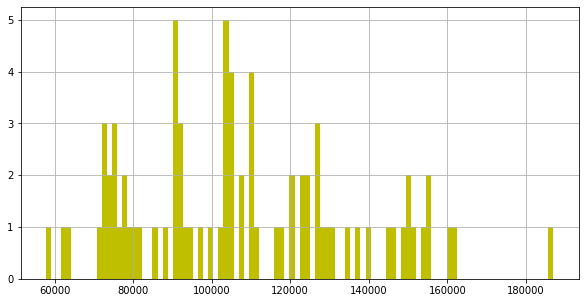

In [36]:
import matplotlib.pyplot as plt
#data.hist(bins=50, figsize(20,15))   #bins구간너비, figsize도표크기
data['salary'].hist(bins=100, figsize=(10,5), color='y')

#2. 이변량 데이터 검색

In [43]:
data.corr()        #지정안하면 pearson피어슨 방법
data.corr(method="spearman")   #spearman
data.corr(method="kendall")    #켄달

,phd,service,salary
phd,1.000000,0.776391,0.437459
service,0.776391,1.000000,0.432258
salary,0.437459,0.432258,1.000000


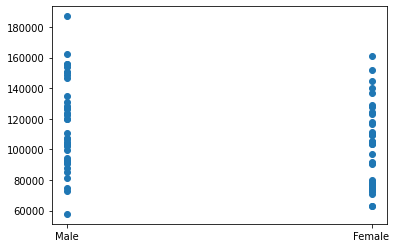

In [48]:
import matplotlib.pyplot as plt
plt.scatter(data['sex'], data['salary'], alpha=1)
plt.show()

In [49]:
data.groupby('sex')[['salary']].describe()

salary                                                           \
        count           mean           std      min      25%       50%   
sex                                                                      
Female   39.0  101002.410256  25952.127317  62884.0  77250.0  103750.0   
Male     39.0  115045.153846  29110.516397  57800.0  92000.0  107300.0   

                            
             75%       max  
sex                         
Female  117002.5  161101.0  
Male    132991.5  186960.0

#3. 이상치 처리

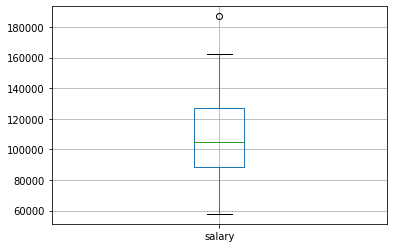

In [58]:
data.boxplot(column='salary', return_type='both')
#data.boxplot(column='salary', return_type='axes')
#data.boxplot(column='salary', return_type='dict')

In [60]:
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary-Q1_salary
IQR_salary

38162.25

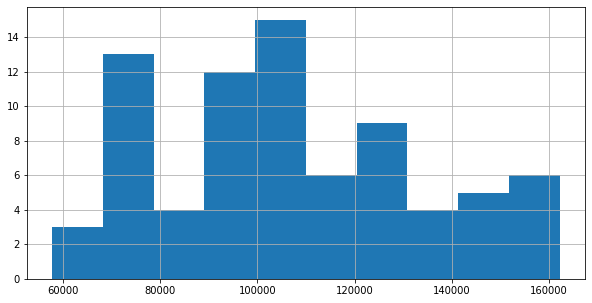

In [68]:
data_IQR = data[(data['salary']<Q3_salary+IQR_salary*1.5)&(data['salary']>Q1_salary-IQR_salary*1.5)]
data_IQR['salary'].hist(bins=10, figsize=(10,5))

In [69]:
data_IQR.corr()

,phd,service,salary
phd,1.000000,0.918546,0.531469
service,0.918546,1.000000,0.478684
salary,0.531469,0.478684,1.000000


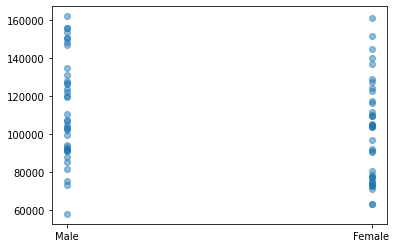

In [71]:
plt.scatter(data_IQR['sex'], data_IQR['salary'], alpha=0.5)
plt.show()

#4. 변수 변환
- log 변환, 제곱근 변환

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f193dfb0c90>,
      dtype=object)

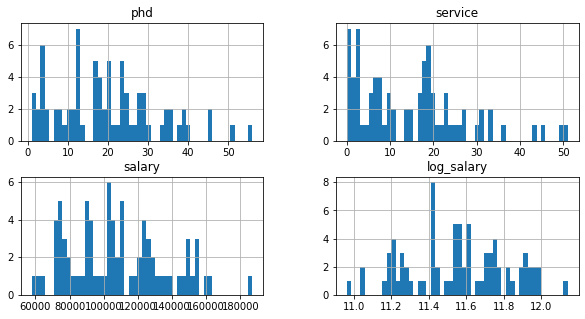

In [76]:
#로그 변환
import numpy as np
data['log_salary'] = np.log(data['salary'])
data.hist(bins=50, figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f193d631550>,
      dtype=object)

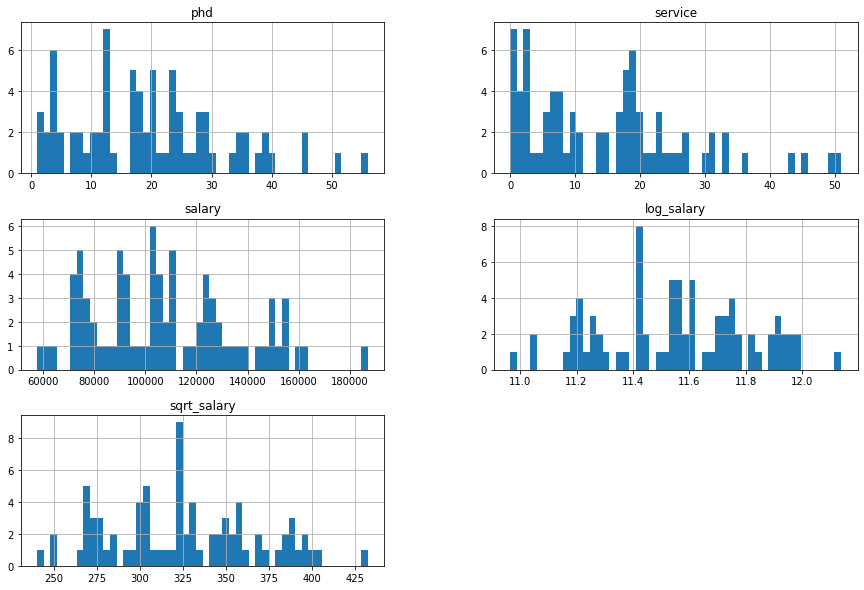

In [79]:
#제곱근 변환
data['sqrt_salary'] = np.sqrt(data['salary'])
data.hist(bins=50, figsize=(15,10))

#5. 결측치 처리

1) 결측치 개수

In [82]:
#NaN의 결측값
data.isnull()    #결측이면 True, 아니면 False

,rank,discipline,phd,service,sex,salary,log_salary,sqrt_salary
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
73,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False
76,False,False,False,False,False,False,False,False


In [83]:
data.notnull()    #결측이면 False, 아니면 True

,rank,discipline,phd,service,sex,salary,log_salary,sqrt_salary
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
73,True,True,True,True,True,True,True,True
74,True,True,True,True,True,True,True,True
75,True,True,True,True,True,True,True,True
76,True,True,True,True,True,True,True,True


In [86]:
data.isnull().sum()    #결측 개수
data['salary'].isnull().sum()    #결측 개수

0

In [89]:
data.notnull().sum()    #결측 개수
data['salary'].notnull().sum()    #결측 개수

78

In [93]:
data.notnull().sum(1)  #1행의 결측값 아닌거 개수
data['valid']=data.notnull().sum(1)
data

,rank,discipline,phd,service,sex,salary,log_salary,sqrt_salary,valid
0,Prof,B,56,49,Male,186960,12.138650,432.388714,8
1,Prof,A,12,6,Male,93000,11.440355,304.959014,8
2,Prof,A,23,20,Male,110515,11.612907,332.437964,8
3,Prof,A,40,31,Male,131205,11.784516,362.222307,8
4,Prof,B,20,18,Male,104800,11.559809,323.728281,8
...,...,...,...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450,11.565992,324.730658,8
74,AssocProf,B,19,6,Female,104542,11.557344,323.329553,8
75,Prof,B,17,17,Female,124312,11.730550,352.579069,8
76,Prof,A,28,14,Female,109954,11.607817,331.593124,8


2) 결측값 제거: dropna()
- 결측값이 있는 행 제거, 결측값이 있는 열 제거, 결측값이 있는 특정 행 또는 열 제거

가) 결측값이 있는 행(가로) 제거

In [94]:
data_del_row = data.dropna(axis=0)

나) 결측값이 있는 열(세로) 제거

In [ ]:
data_del_col = data.dropna(axis=1)

다) 결측값 있는 특정 행/열 제거

In [ ]:
data[['salary']].dropna()

3) 결측값 대체: fillna()

가) 결측값을 특정 값으로 대체

In [ ]:
data_0 = data.fillna(0)   #0으로 대체
data_ffill = data.fillna(method='ffill')   #앞의 값으로 대체
data_bfill = data.fillna(method='bfill')   #뒤의 값으로 대체

나) 결측값을 변수별 평균으로 대체

In [ ]:
data_mean = data.fillna(data.mean())   #평균으로 대체
data_mean = data.fillna(data.median())   #중간값으로 대체

다) 결측값을 다른 변수의 값으로 대체

In [ ]:
data2 = data.copy()
data2['sales_new'] = np.where(pd.notnull(data2['sales'])==True, data2['sales'], data2['salary'])

#where함수 이용해, sales가 결측 아니면 원래값, 결측이면 salary의 값으로.

In [101]:
#data.groupby('salary').mean()

fill_mean_func = lambda g : g.fillna(g.mean())
data_group_mean = data.groupby('salary').apply(fill_mean_func)
data_group_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,,rank,discipline,phd,service,sex,salary,log_salary,sqrt_salary,valid
salary,,,,,,,,,,
57800,9,Prof,A,51,51,Male,57800,10.964744,240.416306,8
62884,54,AssocProf,A,25,22,Female,62884,11.049047,250.766824,8
63100,66,AsstProf,A,7,6,Female,63100,11.052476,251.197134,8
71065,71,AssocProf,B,12,9,Female,71065,11.171350,266.580194,8
72500,55,AsstProf,A,2,0,Female,72500,11.191342,269.258240,8
...,...,...,...,...,...,...,...,...,...,...
155750,31,Prof,B,22,21,Male,155750,11.956007,394.651745,8
155865,27,Prof,A,45,43,Male,155865,11.956746,394.797416,8
161101,72,Prof,B,24,15,Female,161101,11.989787,401.373891,8


In [ ]:
fill_values = {1:1000, 2:2000}
fill_func = lambda d : d.fillna(fill_values[d.name])
data_group_value = data.groupby('sex').apply(fill_func)
data_group_value

#6. 실전 과제

In [102]:
import pandas as pd
data = pd.read_csv('house_raw.csv')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f193d12d510>,
      dtype=object)

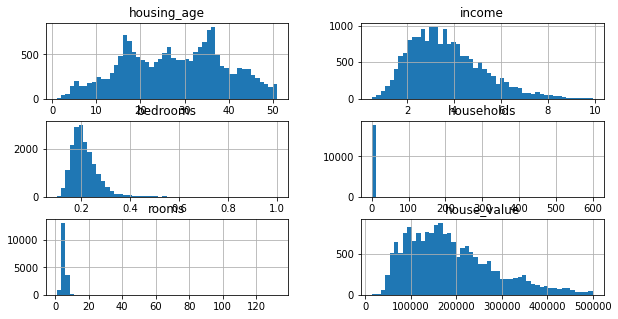

In [103]:
data.hist(bins=50, figsize=(10,5))

In [118]:
X = data[data.columns[0:5]]
y = data[["house_value"]]

#학습용,테스트용 데이터 구분을 위해 라이브러리 불러와서 7:3 비율 할당
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#훈련,테스트데이터 독립변수 단위 동일하게 함
from sklearn.preprocessing import MinMaxScaler  
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

#선형모델을 적용
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

#정확도 확인: 55%
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

#정확도: 음수 = 이유: 이상치 제거
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

-2.822064801016153

14


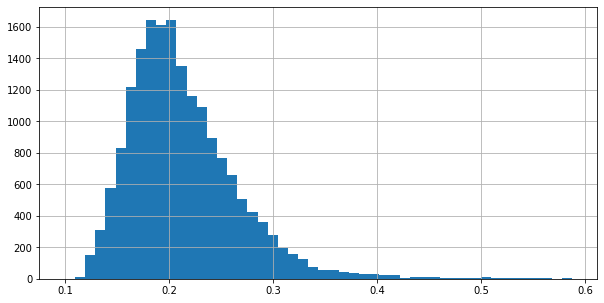

In [119]:
#bedroom: 0.6 이상 제거. 0.6보다 큰 데이터 확인하니 14개.
data_bedroom = data[data['bedrooms']<0.6]
data_bedroom2 = data[data['bedrooms']>=0.6]
data_bedroom['bedrooms'].hist(bins=50, figsize=(10,5))
print(data_bedroom2['bedrooms'].value_counts().sum())

22


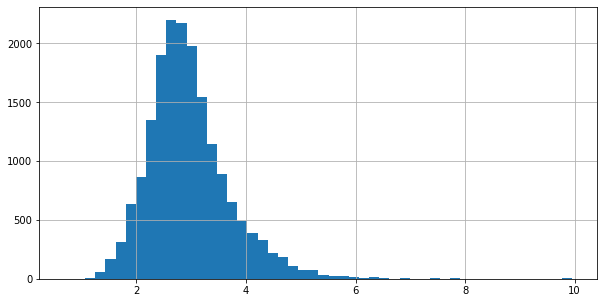

In [120]:
#households: 10 이상 제거. 
data_households = data[data['households']<10]
data_households2 = data[data['households']>=10]
data_households['households'].hist(bins=50, figsize=(10,5))
print(data_households2['households'].value_counts().sum())

17914
64


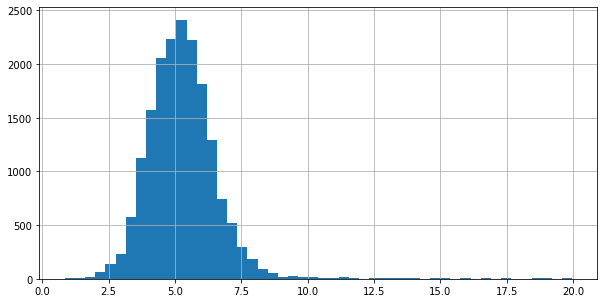

In [130]:
#rooms: 20 이상 제거. 
print(data['rooms'].value_counts().sum())
data_rooms = data[data['rooms']<20]
data_rooms2 = data[data['rooms']>=20]
data_rooms['rooms'].hist(bins=50, figsize=(10,5))
print(data_rooms2['rooms'].value_counts().sum())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19379766d0>,
      dtype=object)

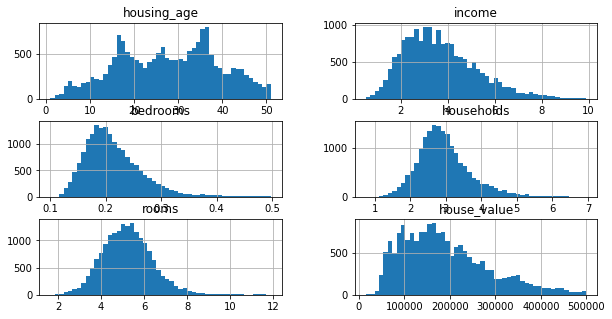

In [131]:
new_data = data[(data['bedrooms']<0.5) & (data['households']<7) & (data['rooms']<12)]
new_data.hist(bins=50, figsize=(10,5))

In [134]:
#특정데이터셋, 레이블데이터셋 나누기
X = new_data[new_data.columns[0:5]]
y = new_data[["house_value"]]

#라이브러리 불러오기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

#데이터 정규화
from sklearn.preprocessing import MinMaxScaler  
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

#선형모델을 적용
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

#훈련데이터 정확도 확인: 55%
pred_train = model.predict(X_scaled_minmax_train)
print("훈련 데이터 정확도", model.score(X_scaled_minmax_train, y_train))

#훈련데이터 정확도 확인: 55%
pred_test = model.predict(X_scaled_minmax_test)
print("테스트데이터 정확도", model.score(X_scaled_minmax_test, y_test))

new_data.to_csv('housing_price.csv', index=False)

훈련 데이터 정확도 0.5706921210926263
테스트데이터 정확도 0.5826083517811865


훈련 데이터 정확도 0.5870830303525048
테스트데이터 정확도 0.5741518782375725


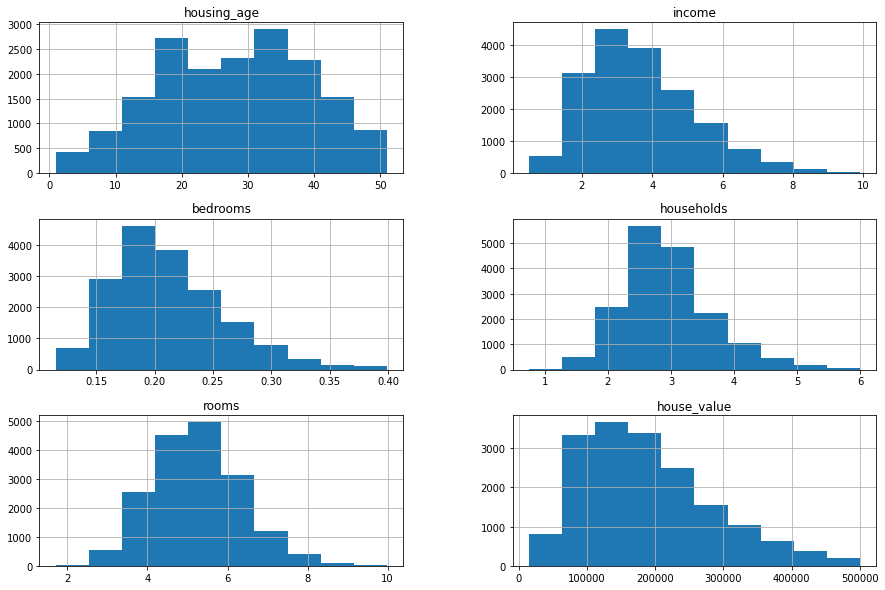

In [166]:
#최종

import numpy as np
import pandas as pd

data = pd.read_csv('house_raw.csv')

new_data = data[(data['bedrooms']<0.4) & (data['households']<6) & (data['rooms']<10)]
new_data.hist(bins=10, figsize=(15,10))
#data_rooms = data[data['rooms']<20]
#data_rooms['rooms'].hist(bins=50, figsize=(10,5))
#print(data['rooms'].value_counts().sum())
#print(data_rooms2['rooms'].value_counts().sum())

X = new_data[new_data.columns[0:5]]
y = new_data[["house_value"]]

#라이브러리 불러오기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

#데이터 정규화
from sklearn.preprocessing import MinMaxScaler  
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

#선형모델을 적용
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

#훈련데이터 정확도 확인: 55%
pred_train = model.predict(X_scaled_minmax_train)
print("훈련 데이터 정확도", model.score(X_scaled_minmax_train, y_train))

#훈련데이터 정확도 확인: 55%
pred_test = model.predict(X_scaled_minmax_test)
print("테스트데이터 정확도", model.score(X_scaled_minmax_test, y_test))

new_data.to_csv('housing_price.csv', index=False)